In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from pywave.energy_transport.advect1d import Advect1D

In [2]:
def init_shape(x, shape="step"):
    if shape == "gaussian":
        std = 4
        return np.exp(-pow((x-15)/std, 2)/2)

    #step
    out = np.ones_like(x)
    out[x<6] = 0
    out[x>16] = 0
    return out

In [3]:
def run(adv, u0, c, x, outdir, shape="step"):
    print(f'Saving figs in {outdir}')
    os.makedirs(outdir, exist_ok=True)
    #plot initial conditions
    plot_step(x, u0, c, 0,  adv.dt, outdir, shape=shape)
    u = np.copy(u0)
    for n in range(50):
        plt.close()
        u = adv.step(u, c)
        plot_step(x, u, c, n+1,  adv.dt, outdir, shape=shape)

In [4]:
def plot_step(x, u, c, n, dt, outdir, shape="step"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, u, '--')
    t = n * dt
    exact = init_shape(x - c * t, shape=shape)
    ax.plot(x, exact, 'r')
    ax.set_title(f't = {t}s')
    ax.set_xlabel('x, m')
    ax.set_ylabel('c')
    figname = '%s/adv%2.2i.png' %(outdir, n)
    fig.savefig(figname)

In [5]:
cfl = .9
dx = 1
dt = 1
c = .9*dx/dt
x = np.arange(100)*dx
# shape = "gaussian"
shape = "step"
u0 = init_shape(x, shape=shape)

## First-order upwind
Let $\mathcal{C}=c\Delta t/\Delta x$.
\begin{align}
u^{n+1}_i = u^{n}_i
- \mathcal{C}
\left(u^{n}_{i} - u^{n}_{i-1}\right).
\end{align}

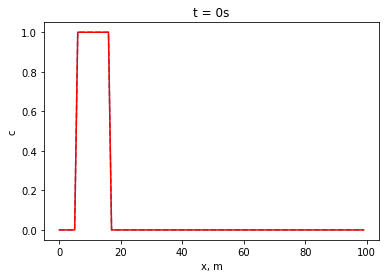

In [6]:
adv = Advect1D(dx, dt, scheme='first_order_upwind')
outdir = 'figs_fou'
plot_step(x, u0, c, 0,  dt, outdir, shape=shape)

Saving figs in figs_fou


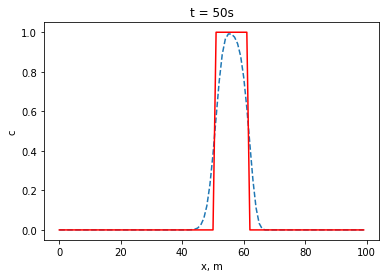

In [7]:
run(adv, u0, c, x, outdir, shape=shape)

Saving figs in figs_lf


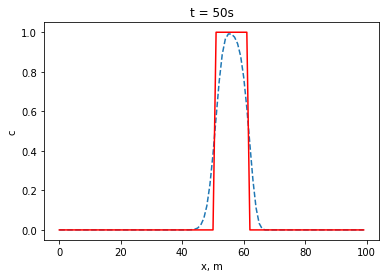

In [8]:
adv = Advect1D(dx, dt, scheme='lax_friedrichs')
run(adv, u0, c, x, outdir='figs_lf', shape=shape)

## Lax-Wendroff
Let $\mathcal{C}=c\Delta t/\Delta x$.
\begin{align}
u^{n+1}_i = u^{n}_i
- \frac{\mathcal{C}}{2}
\left(u^{n}_{i+1} - u^{n}_{i-1}\right)
+\frac{\mathcal{C}^2}{2}
\left(u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1}\right)
\end{align}

Saving figs in figs_lw


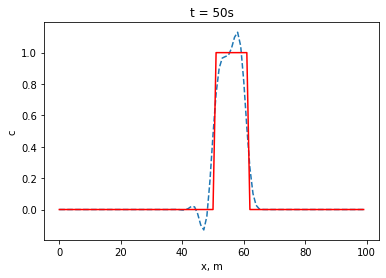

In [9]:
adv = Advect1D(dx, dt, scheme='lax_wendroff')
run(adv, u0, c, x, outdir='figs_lw', shape=shape)

Saving figs in figs_lw_vl


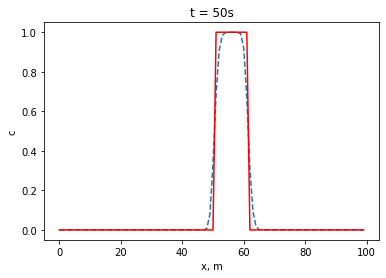

In [10]:
adv = Advect1D(dx, dt, scheme='lax_wendroff', limiter='van_leer')
run(adv, u0, c, x, outdir='figs_lw_vl', shape=shape)

Saving figs in figs_lw_sb


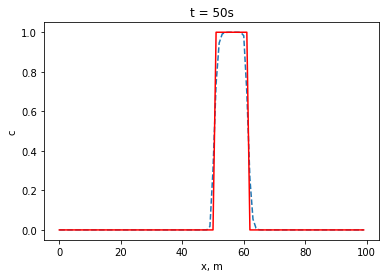

In [11]:
adv = Advect1D(dx, dt, scheme='lax_wendroff', limiter='superbee')
run(adv, u0, c, x, outdir='figs_lw_sb', shape=shape)